# first we'll do data-preprocessing.
our chat is in text file, i want to extract that text file and will convert it into pandas data frame.
concepts used here will be Regular Expression.


In [1]:
#I have used two libraries- regular expression and pandas

import re
import pandas as pd

In [2]:
#opening file using file handling in python

f = open('WhatsApp Chat with five Friends.txt','r',encoding='utf-8')

In [3]:
#this will read all the content of file in the form of string and store that in data variable
data = f.read()

In [4]:
print(data)

 22/08/2022, 20:54 - Aditya : Me to ni kr raha
22/08/2022, 20:56 - Aditya : Baal bda liye n wapas aur ni aunga pehchan me
22/08/2022, 20:56 - Aditya : Clg ke pehle katwaye the uske baad se ni
24/08/2022, 13:34 - Hemu : arre yrr isko kya ho gaya
24/08/2022, 13:34 - Hemu : submit krne ko kyun bol rahi hai ye ab😑
24/08/2022, 13:44 - Adeeba : Same maine bhi socha h
24/08/2022, 13:44 - Hemu : and vahi bhej dunga pooche to🤣
24/08/2022, 13:46 - Adeeba : <Media omitted>
24/08/2022, 13:55 - Aditya : accha aisa
24/08/2022, 13:57 - Adeeba : Dekh main tere Mann ki baat jaan li thi
24/08/2022, 13:58 - Hemu : 😂😂
24/08/2022, 13:59 - Hemu : iski overacting
24/08/2022, 14:02 - Aditya : telepathy hogyi
24/08/2022, 14:04 - Adeeba : Party Dene k liye ready rehna
24/08/2022, 14:18 - Hemu : oh
24/08/2022, 14:19 - Hemu : kiska bday
24/08/2022, 14:19 - Adeeba : Tera bday
24/08/2022, 14:30 - Hemu : kahan se bheje ss to mile pahleee
24/08/2022, 14:31 - Adeeba : Bas
24/08/2022, 14:32 - Harshit : Ruko main bhejta

In [5]:
#whole whatsapp chat is stored in the form of a string and here we're just verifying the data type of our chat data

print(type(data))

<class 'str'>


Now I want to convert this in Pandas Data Frame. Pandas is a library in Python.

now i will write date in different column and user name in different column

basically, i want to create a new data frame which will contain two columns namely Message and Date. Message will contain   
user name and the content of message. For that I have written a regular expression string.

In [6]:
#writing the regular expression of string

pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

You can also use regex101.com, if you dont know how to write regular expression

In [7]:
messages = re.split(pattern, data)[1:] #here I've used string slicing so that empty list can be removed
len(messages)

101

In [8]:
#Extracting dates

dates = re.findall(pattern, data)
dates

['22/08/2022, 20:54 - ',
 '22/08/2022, 20:56 - ',
 '22/08/2022, 20:56 - ',
 '24/08/2022, 13:34 - ',
 '24/08/2022, 13:34 - ',
 '24/08/2022, 13:44 - ',
 '24/08/2022, 13:44 - ',
 '24/08/2022, 13:46 - ',
 '24/08/2022, 13:55 - ',
 '24/08/2022, 13:57 - ',
 '24/08/2022, 13:58 - ',
 '24/08/2022, 13:59 - ',
 '24/08/2022, 14:02 - ',
 '24/08/2022, 14:04 - ',
 '24/08/2022, 14:18 - ',
 '24/08/2022, 14:19 - ',
 '24/08/2022, 14:19 - ',
 '24/08/2022, 14:30 - ',
 '24/08/2022, 14:31 - ',
 '24/08/2022, 14:32 - ',
 '24/08/2022, 14:35 - ',
 '24/08/2022, 14:35 - ',
 '24/08/2022, 14:36 - ',
 '25/08/2022, 10:24 - ',
 '25/08/2022, 10:24 - ',
 '25/08/2022, 10:25 - ',
 '25/08/2022, 10:32 - ',
 '25/08/2022, 10:32 - ',
 '25/08/2022, 10:36 - ',
 '25/08/2022, 10:48 - ',
 '25/08/2022, 11:21 - ',
 '25/08/2022, 11:21 - ',
 '25/08/2022, 11:33 - ',
 '25/08/2022, 11:33 - ',
 '25/08/2022, 11:41 - ',
 '25/08/2022, 11:41 - ',
 '25/08/2022, 11:41 - ',
 '25/08/2022, 11:41 - ',
 '25/08/2022, 11:42 - ',
 '25/08/2022, 11:44 - ',


Now I have two lists. One containing username and messages. The other list containing the date at which the message was sent.

In [9]:
#now I've created a pandas dataframe which contains two columns namely user_message and the other message_date

df = pd.DataFrame({'user_message': messages, 'message_date': dates})

In [10]:
# convert message_date explicitly to datetime

df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

In [11]:
df.rename(columns={'message_date': 'date'}, inplace=True)

In [12]:
df.head() #head will show top 5 messages

,user_message,date
0,Aditya : Me to ni kr raha\n,2022-08-22 20:54:00
1,Aditya : Baal bda liye n wapas aur ni aunga pe...,2022-08-22 20:56:00
2,Aditya : Clg ke pehle katwaye the uske baad se...,2022-08-22 20:56:00
3,Hemu : arre yrr isko kya ho gaya\n,2022-08-24 13:34:00
4,Hemu : submit krne ko kyun bol rahi hai ye ab😑\n,2022-08-24 13:34:00


From the output, I can see that the user name and message is in same column. So, I want to bifurcate user name and column.

In [13]:
df.shape #it displays total rows and columns currently

(101, 2)

In [14]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message) #splitting on this pattern so that is username:string is there, split it.
    if entry[1:]:  # user name
        users.append(entry[1]) #creating a list and inserting all the users
        messages.append(" ".join(entry[2:])) #second part of the string(after colon), adding that in messages
    else:
        users.append('group_notification') #if any string doesn't contain colon, then it'll be a group notification, 
                                           #so appending that in users
        messages.append(entry[0]) #rest will remain as it is in messages
        
df['user'] = users #creating new column named user
df['message'] = messages #creating new column named message
df.drop(columns=['user_message'], inplace=True)

df.head()

,date,user,message
0,2022-08-22 20:54:00,Aditya,Me to ni kr raha\n
1,2022-08-22 20:56:00,Aditya,Baal bda liye n wapas aur ni aunga pehchan me\n
2,2022-08-22 20:56:00,Aditya,Clg ke pehle katwaye the uske baad se ni\n
3,2022-08-24 13:34:00,Hemu,arre yrr isko kya ho gaya\n
4,2022-08-24 13:34:00,Hemu,submit krne ko kyun bol rahi hai ye ab😑\n


Now, it can be seen that date, user and message are bifurcated

Now, I'll further bifurcate my date column in year, month and date. After that I'll move to streamlit to convert it into web
application.

In [15]:
#extracting year

df['year'] = df['date'].dt.year

In [16]:
df.head()

,date,user,message,year
0,2022-08-22 20:54:00,Aditya,Me to ni kr raha\n,2022
1,2022-08-22 20:56:00,Aditya,Baal bda liye n wapas aur ni aunga pehchan me\n,2022
2,2022-08-22 20:56:00,Aditya,Clg ke pehle katwaye the uske baad se ni\n,2022
3,2022-08-24 13:34:00,Hemu,arre yrr isko kya ho gaya\n,2022
4,2022-08-24 13:34:00,Hemu,submit krne ko kyun bol rahi hai ye ab😑\n,2022


Now it can be seen from the output that a new column named "year" is also present. Similarly, I'll do it for month, day, hour
and minute.

In [17]:
df['month'] = df['date'].dt.month_name()

In [18]:
df['day'] = df['date'].dt.day

In [19]:
df['hour'] = df['date'].dt.hour

In [20]:
df['minute'] = df['date'].dt.minute

In [21]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-08-22 20:54:00,Aditya,Me to ni kr raha\n,2022,August,22,20,54
1,2022-08-22 20:56:00,Aditya,Baal bda liye n wapas aur ni aunga pehchan me\n,2022,August,22,20,56
2,2022-08-22 20:56:00,Aditya,Clg ke pehle katwaye the uske baad se ni\n,2022,August,22,20,56
3,2022-08-24 13:34:00,Hemu,arre yrr isko kya ho gaya\n,2022,August,24,13,34
4,2022-08-24 13:34:00,Hemu,submit krne ko kyun bol rahi hai ye ab😑\n,2022,August,24,13,34


# Now our pre-processing is done. Our data frame is ready.

In [22]:
df[df['user'] == 'Adeeba'].shape

(1, 8)

In [23]:
words = []
for message in df['message']:
    words.extend(message.split())

In [24]:
len(words)

358

In [25]:
df[df['user'] == 'Adeeba'].shape

(1, 8)

In [26]:
for message in df['message']:
    print(message) #it will print all the messages

Me to ni kr raha

Baal bda liye n wapas aur ni aunga pehchan me

Clg ke pehle katwaye the uske baad se ni

arre yrr isko kya ho gaya

submit krne ko kyun bol rahi hai ye ab😑

Same maine bhi socha h

and vahi bhej dunga pooche to🤣

<Media omitted>

accha aisa

Dekh main tere Mann ki baat jaan li thi

😂😂

iski overacting

telepathy hogyi

Party Dene k liye ready rehna

oh

kiska bday

Tera bday

kahan se bheje ss to mile pahleee

Bas

Ruko main bhejta hun ans

Ohhhooo

noiceee

Arre 😂😂

abhi start nahi kra hoon

me dfa dekhta tb tk

https://www.tutorialspoint.com/design-a-dfa-accepting-a-language-l-having-number-of-zeros-in-multiples-of-3

class me join he ki leave krdiya

leave krdiya kabka

kya pata sabko mil jaye

isme steps of nlp hi batana he n

arre sry mai nahane chala gaya tha

abhi dekhta hoon

https://www.tutorialspoint.com/design-a-dfa-accepting-a-language-l-having-number-of-zeros-in-multiples-of-3

https://medium.com/nlplanet/two-minutes-nlp-perplexity-explained-with-simple-p

In [27]:
words = []
for message in df['message']:
    words.extend(message.split())
    

In [28]:
len(words) #total number of words typed by all members in the group

358

In [29]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [30]:

from urlextract import URLExtract

extractor = URLExtract()
urls = extractor.find_urls("Let's have URL stackoverflow.com as an example, http://facebook.com, ftp://url.in")
#fetching urls
urls

['stackoverflow.com', 'http://facebook.com', 'ftp://url.in']

In [31]:
links = []

for message in df['message']:
    print(extractor.find_urls(message)) #I've made an extractor object and whenever any particular message has a link or url,
                                #then this function will extract that and put that in a list else it will give an empty list
        

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['https://www.tutorialspoint.com/design-a-dfa-accepting-a-language-l-having-number-of-zeros-in-multiples-of-3']
[]
[]
[]
[]
[]
[]
['https://www.tutorialspoint.com/design-a-dfa-accepting-a-language-l-having-number-of-zeros-in-multiples-of-3']
['https://medium.com/nlplanet/two-minutes-nlp-perplexity-explained-with-simple-probabilities-6cdc46884584']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [32]:
links = []

for message in df['message']:
    links.extend(extractor.find_urls(message))
    
links #this will give a list of all links

['https://www.tutorialspoint.com/design-a-dfa-accepting-a-language-l-having-number-of-zeros-in-multiples-of-3',
 'https://www.tutorialspoint.com/design-a-dfa-accepting-a-language-l-having-number-of-zeros-in-multiples-of-3',
 'https://medium.com/nlplanet/two-minutes-nlp-perplexity-explained-with-simple-probabilities-6cdc46884584']

In [33]:
len(links)

3

In [34]:
df

,date,user,message,year,month,day,hour,minute
0,2022-08-22 20:54:00,Aditya,Me to ni kr raha\n,2022,August,22,20,54
1,2022-08-22 20:56:00,Aditya,Baal bda liye n wapas aur ni aunga pehchan me\n,2022,August,22,20,56
2,2022-08-22 20:56:00,Aditya,Clg ke pehle katwaye the uske baad se ni\n,2022,August,22,20,56
3,2022-08-24 13:34:00,Hemu,arre yrr isko kya ho gaya\n,2022,August,24,13,34
4,2022-08-24 13:34:00,Hemu,submit krne ko kyun bol rahi hai ye ab😑\n,2022,August,24,13,34
...,...,...,...,...,...,...,...,...
96,2022-09-02 12:45:00,Aditya,accha\n,2022,September,2,12,45
97,2022-09-02 12:45:00,Adeeba,Kitne mile\n,2022,September,2,12,45
98,2022-09-02 12:45:00,Adeeba,Tujhe\n,2022,September,2,12,45
99,2022-09-02 12:46:00,Adeeba,Bta\n,2022,September,2,12,46


In [35]:
x = df['user'].value_counts().head() #top 5 busy users in the group

In [36]:
round((df['user'].value_counts()/df.shape[0])*100,2) #percentage of message done by each user

Aditya      36.63
Hemu        31.68
Adeeba      22.77
Harshit      7.92
Adeeba       0.99
Name: user, dtype: float64

In [37]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index() #converting it into data frame

,index,user
0,Aditya,36.63
1,Hemu,31.68
2,Adeeba,22.77
3,Harshit,7.92
4,Adeeba,0.99


In [38]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,Aditya,36.63
1,Hemu,31.68
2,Adeeba,22.77
3,Harshit,7.92
4,Adeeba,0.99


In [39]:
#plotting bar chart

import matplotlib.pyplot as plt

In [40]:
name = x.index
count = x.values

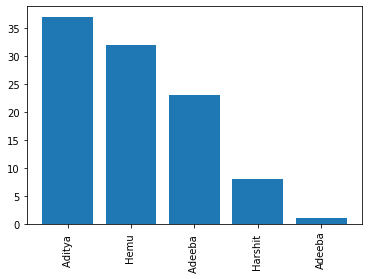

In [41]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
# remove group notification

df[df['user'] == 'group_notification']

,date,user,message,year,month,day,hour,minute


In [43]:
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [44]:
f = open('stop_hinglish.txt','r')
stop_words = f.read()
print(stop_words)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [45]:
words = []

for messages in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
            
    words.extend(message.split())

In [46]:
from collections import Counter
Counter(words) #calculating the frequency of each word

Counter({'same': 97, 'hi': 97, 'he': 97, 'apne': 97})

In [47]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(4))

,0,1
0,same,97
1,hi,97
2,he,97
3,apne,97


It can be seen that most of them are stop words. Stop words are used in sentence formation but they do not have an appropriate
meaning. So, we need to remove group notification meessages like "someone left the group", "someone changed the group icon" etc. then remove media omitted message. Finally remove stop words and repeat this process.

In [48]:
df['month_num'] = df['date'].dt.month

In [49]:
timeline = df.groupby(['year','month_num','month']).count()['message'].reset_index() 
timeline

,year,month_num,month,message
0,2022,8,August,79
1,2022,9,September,22


In [50]:
#merging year and month column

time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))
    
time

['August-2022', 'September-2022']

In [51]:
timeline['time'] = time
timeline

,year,month_num,month,message,time
0,2022,8,August,79,August-2022
1,2022,9,September,22,September-2022


 All this processing is donne to keep time on x axis and message on y axis respectively.

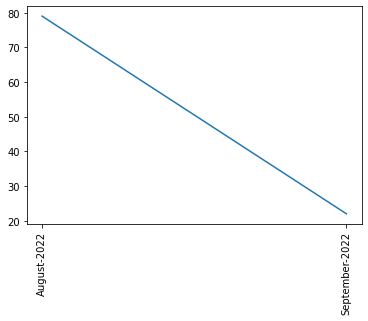

In [52]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [53]:
#extracting date

df['only_date'] = df['date'].dt.date

In [54]:
#displaying daily timeline of the group members

daily_timeline = df.groupby('only_date').count()['message'].reset_index()
daily_timeline

,only_date,message
0,2022-08-22,3
1,2022-08-24,20
2,2022-08-25,29
3,2022-08-27,15
4,2022-08-30,12
5,2022-09-01,12
6,2022-09-02,10


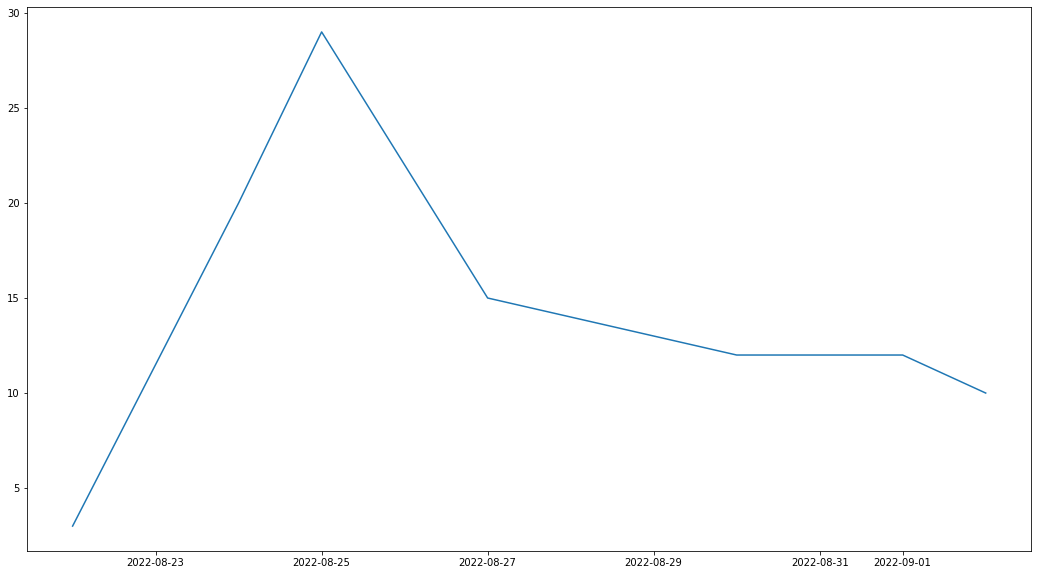

In [55]:
plt.figure(figsize=(18,10))

plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [56]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2022-08-22 20:54:00,Aditya,Me to ni kr raha\n,2022,August,22,20,54,8,2022-08-22
1,2022-08-22 20:56:00,Aditya,Baal bda liye n wapas aur ni aunga pehchan me\n,2022,August,22,20,56,8,2022-08-22
2,2022-08-22 20:56:00,Aditya,Clg ke pehle katwaye the uske baad se ni\n,2022,August,22,20,56,8,2022-08-22
3,2022-08-24 13:34:00,Hemu,arre yrr isko kya ho gaya\n,2022,August,24,13,34,8,2022-08-24
4,2022-08-24 13:34:00,Hemu,submit krne ko kyun bol rahi hai ye ab😑\n,2022,August,24,13,34,8,2022-08-24


In [57]:
df['day_name'] = df['date'].dt.day_name()

In [58]:
df['day_name'].value_counts() #this tells the day at which the group members were most active on

Thursday     41
Wednesday    20
Saturday     15
Tuesday      12
Friday       10
Monday        3
Name: day_name, dtype: int64

In [59]:
df['month'].value_counts()

August       79
September    22
Name: month, dtype: int64

# Now I'll make a heap map which will signify at what time the users were most active and least active on WhatsApp during the whole week. 

x-axis shows time period
y-axis shows the days

The lighter the shade, more active are the users.
The darker the shade, less active are the users.

In [60]:
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [61]:
df['period'] = period

In [62]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
17,2022-08-24 14:30:00,Hemu,kahan se bheje ss to mile pahleee\n,2022,August,24,14,30,8,2022-08-24,Wednesday,14-15
56,2022-08-27 20:42:00,Adeeba,Kya\n,2022,August,27,20,42,8,2022-08-27,Saturday,20-21
41,2022-08-25 11:58:00,Aditya,sbko aaj hi aasgnment dena he kya\n,2022,August,25,11,58,8,2022-08-25,Thursday,11-12
81,2022-09-01 11:31:00,Aditya,kya pta\n,2022,September,1,11,31,9,2022-09-01,Thursday,11-12
50,2022-08-25 12:03:00,Hemu,😂\n,2022,August,25,12,3,8,2022-08-25,Thursday,12-13


Now, it can be seen that a new column named period is also in the dataframe. so, if there's 10 then period will be 10-11 and so on. After this, Plot a pivot table.

In [63]:
!pip install seaborn

In [64]:
import seaborn as sns

In [65]:
df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0)

period,10-11,11-12,12-13,13-14,14-15,20-21
day_name,,,,,,
Friday,0.0,0.0,10.0,0.0,0.0,0.0
Monday,0.0,0.0,0.0,0.0,0.0,3.0
Saturday,0.0,1.0,0.0,1.0,0.0,13.0
Thursday,7.0,25.0,9.0,0.0,0.0,0.0
Tuesday,7.0,3.0,2.0,0.0,0.0,0.0
Wednesday,0.0,0.0,0.0,9.0,11.0,0.0


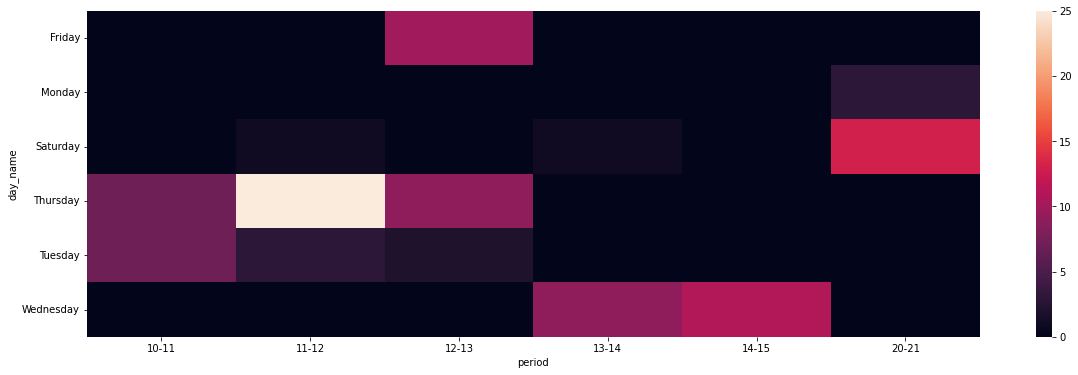

In [66]:

plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
#there might be any day in any particular period where no msg will be there, so fillna() will fill that value with 0.
plt.yticks(rotation='horizontal')
plt.show()

# So, this was the over all DETAILED ORIENTED ANALYSIS.